In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Internship/Kaggle'

# **Load dataset**

In [ ]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

 99% 1.61G/1.62G [00:10<00:00, 77.5MB/s]
100% 1.62G/1.62G [00:10<00:00, 167MB/s] 


In [ ]:
!kaggle datasets download -d jr2ngb/cataractdataset

100% 3.34G/3.34G [01:30<00:00, 66.1MB/s]
100% 3.34G/3.34G [01:30<00:00, 39.5MB/s]


In [ ]:
!unzip ocular-disease-recognition-odir5k.zip -d dataset1    

Streaming output truncated to the last 5000 lines.
  inflating: dataset1/preprocessed_images/2179_left.jpg  
  inflating: dataset1/preprocessed_images/2179_right.jpg  
  inflating: dataset1/preprocessed_images/217_left.jpg  
  inflating: dataset1/preprocessed_images/217_right.jpg  
  inflating: dataset1/preprocessed_images/2180_left.jpg  
  inflating: dataset1/preprocessed_images/2180_right.jpg  
  inflating: dataset1/preprocessed_images/2181_left.jpg  
  inflating: dataset1/preprocessed_images/2181_right.jpg  
  inflating: dataset1/preprocessed_images/2182_left.jpg  
  inflating: dataset1/preprocessed_images/2182_right.jpg  
  inflating: dataset1/preprocessed_images/2183_left.jpg  
  inflating: dataset1/preprocessed_images/2183_right.jpg  
  inflating: dataset1/preprocessed_images/2184_left.jpg  
  inflating: dataset1/preprocessed_images/2184_right.jpg  
  inflating: dataset1/preprocessed_images/2185_left.jpg  
  inflating: dataset1/preprocessed_images/2185_right.jpg  
  inflating: da

In [ ]:
!unzip cataractdataset.zip -d dataset2    

Archive:  cataractdataset.zip
  inflating: dataset2/README.md      
  inflating: dataset2/dataset/1_normal/NL_001.png  
  inflating: dataset2/dataset/1_normal/NL_002.png  
  inflating: dataset2/dataset/1_normal/NL_003.png  
  inflating: dataset2/dataset/1_normal/NL_004.png  
  inflating: dataset2/dataset/1_normal/NL_005.png  
  inflating: dataset2/dataset/1_normal/NL_006.png  
  inflating: dataset2/dataset/1_normal/NL_007.png  
  inflating: dataset2/dataset/1_normal/NL_008.png  
  inflating: dataset2/dataset/1_normal/NL_009.png  
  inflating: dataset2/dataset/1_normal/NL_010.png  
  inflating: dataset2/dataset/1_normal/NL_011.png  
  inflating: dataset2/dataset/1_normal/NL_012.png  
  inflating: dataset2/dataset/1_normal/NL_013.png  
  inflating: dataset2/dataset/1_normal/NL_014.png  
  inflating: dataset2/dataset/1_normal/NL_015.png  
  inflating: dataset2/dataset/1_normal/NL_016.png  
  inflating: dataset2/dataset/1_normal/NL_017.png  
  inflating: dataset2/dataset/1_normal/NL_018.pn

In [ ]:
import pandas as pd
df = pd.read_csv("/content/dataset1/full_df.csv")

In [ ]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
len(df)

6392

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [ ]:
labels = df['labels']
print(labels)
classes = set(labels)
print(classes)

0       ['N']
1       ['N']
2       ['D']
3       ['D']
4       ['D']
        ...  
6387    ['D']
6388    ['D']
6389    ['D']
6390    ['D']
6391    ['H']
Name: labels, Length: 6392, dtype: object
{"['D']", "['H']", "['C']", "['M']", "['N']", "['G']", "['O']", "['A']"}


In [ ]:
import os
def find_in_dir(index):
    path = '/content/dataset1/preprocessed_images'
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            name = str(os.path.join(dirpath,filename))
            f = filename.split('_')
            if(index == f[0]):  
                return name        

In [ ]:
import shutil, os

os.mkdir('/content/dataset1/Datasets')
os.mkdir('/content/dataset1/Datasets/C')
os.mkdir('/content/dataset1/Datasets/N')

#os.mkdir('/content/dataset/Datasets/D')
# os.mkdir('/content/dataset/Datasets/not_C')
# os.mkdir('/content/dataset/Datasets/G')
# os.mkdir('/content/dataset/Datasets/not_G')
# os.mkdir('/content/dataset/Datasets/H')
# os.mkdir('/content/dataset/Datasets/O')
# os.mkdir('/content/dataset/Datasets/A')
# os.mkdir('/content/dataset/Datasets/M')

for i,j in zip(df["labels"],df["filename"]):
    index = j.split("_")
    z = find_in_dir(index[0])
    if z == None :
        continue
    # if i == "['D']":
    #     shutil.move(z, '/content/dataset/Datasets/D')
    if i == "['C']":
        shutil.move(z, '/content/dataset1/Datasets/C')
    # else:
    #     shutil.move(z, '/content/dataset/Datasets/not_C')
    if i == "['N']":
        shutil.move(z, '/content/dataset1/Datasets/N')
    # if i == "['G']":
    #     shutil.move(z, '/content/dataset/Datasets/G')
    # if i == "['H']":
    #     shutil.move(z, '/content/dataset/Datasets/H')
    # if i == "['O']":
    #     shutil.move(z, '/content/dataset/Datasets/O')
    # if i == "['A']":
    #     shutil.move(z, '/content/dataset/Datasets/A')
    # if i == "['M']": 
    #     shutil.move(z, '/content/dataset/Datasets/M')   

In [ ]:
import os

path = '/content/dataset2/dataset/1_normal'
for (dirpath, dirnames, filenames) in os.walk(path):
    for filename in filenames:
        name = str(os.path.join(dirpath,filename))
        shutil.move(name, '/content/dataset1/Datasets/N')

In [ ]:
import os

path = '/content/dataset2/dataset/2_cataract'
for (dirpath, dirnames, filenames) in os.walk(path):
    for filename in filenames:
        name = str(os.path.join(dirpath,filename))
        shutil.move(name, '/content/dataset1/Datasets/C')

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/dataset1/Datasets', output="/content/ocular_disease_dataset", seed=1337, ratio=(0.8, 0.2))

Copying files: 3566 files [00:31, 114.34 files/s]


In [ ]:
train_path = '/content/ocular_disease_dataset/train'
val_path = '/content/ocular_disease_dataset/val'

In [ ]:
from glob import glob
from tensorflow.keras.applications  import Xception

In [ ]:
model = Xception(input_shape=(224,224,3),weights='imagenet', include_top=False)

In [ ]:
model.trainable = False

In [ ]:
model.summary()

In [ ]:
folders = glob('/content/ocular_disease_dataset/train/*')

In [ ]:
folders

['/content/ocular_disease_dataset/train/C',
 '/content/ocular_disease_dataset/train/N']

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D

In [ ]:
x = model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)
model_1 = Model(inputs=model.input, outputs=predictions)    
model_1.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam
model_1.compile(optimizer=Adam(learning_rate = 0.00001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# shutil.rmtree("/content/ocular_disease_dataset/train/.ipynb_checkpoints")

In [ ]:
# shutil.rmtree("/content/ocular_disease_dataset/val/.ipynb_checkpoints")

# **Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   rotation_range = 20)
val_datagen = ImageDataGenerator(rescale = 1./255,
                                 horizontal_flip=True,
                                 rotation_range = 20)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

Found 2852 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (224,224),
                                          batch_size = 32,
                                          shuffle = True,
                                          class_mode = 'categorical')

Found 714 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'C': 0, 'N': 1}

# **Train Model**

In [ ]:
r = model_1.fit(training_set,
                validation_data=val_set,
                epochs=15)

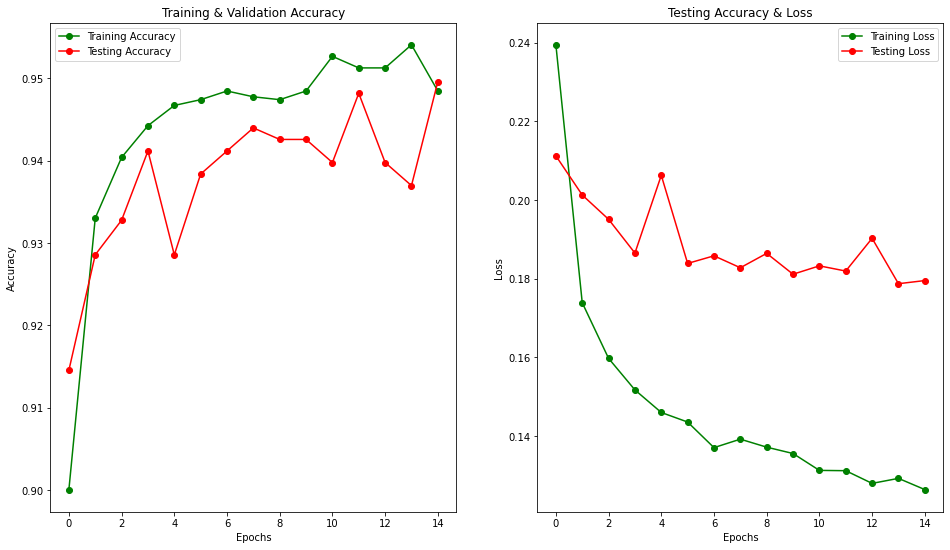

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
# model_1.save('/content/drive/MyDrive/ai_healthcare/ocular_Cataract_models/model_inceptionv3.h5')

# **Results**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
val_set_eval = val_datagen.flow_from_directory(val_path,
                                          target_size = (224,224),
                                          batch_size = 32,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 714 images belonging to 2 classes.


In [ ]:
Y_pred = model_1.predict_generator(val_set_eval, len(val_set_eval.classes)//val_set_eval.batch_size +1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
val_set_eval.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print('Confusion Matrix')
cf = confusion_matrix(val_set_eval.classes, y_pred)
print(cf)

Confusion Matrix
[[ 58  21]
 [ 16 619]]


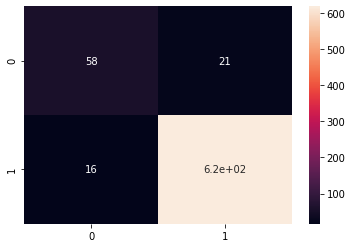

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf,annot=True)
plt.savefig('model2')

In [ ]:
print('Classification Report')
target_names = ['Cataract','No_cataract']
print(classification_report(val_set_eval.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Cataract       0.78      0.73      0.76        79
 No_cataract       0.97      0.97      0.97       635

    accuracy                           0.95       714
   macro avg       0.88      0.85      0.86       714
weighted avg       0.95      0.95      0.95       714



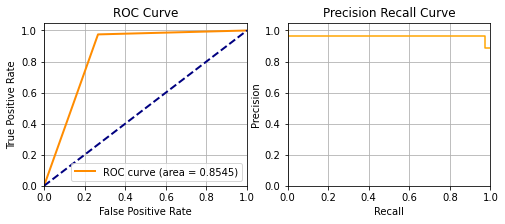

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
fpr, tpr, _ = roc_curve(val_set_eval.classes, y_pred)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(val_set.classes, y_pred)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)